In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("module2.csv")

In [3]:
df.dtypes

Date                       object
Unnamed: 0                  int64
Symbol                     object
Series                     object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
ClosePrice                float64
Average Price             float64
Total_Traded_Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Month                       int64
Year                        int64
VWAP                      float64
Profit_Loss               float64
Day_perc_change           float64
Trend                      object
Upperband                 float64
Lowerband                 float64
Middle                    float64
dtype: object

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.dropna(inplace =True)

In [6]:
df.isnull().any()

Date                      False
Symbol                    False
Series                    False
Prev Close                False
Open Price                False
High Price                False
Low Price                 False
Last Price                False
ClosePrice                False
Average Price             False
Total_Traded_Quantity     False
Turnover                  False
No. of Trades             False
Deliverable Qty           False
% Dly Qt to Traded Qty    False
Month                     False
Year                      False
VWAP                      False
Profit_Loss               False
Day_perc_change           False
Trend                     False
Upperband                 False
Lowerband                 False
Middle                    False
dtype: bool

In [7]:
conditions = [(df['ClosePrice']< df['Lowerband']),
               (df['ClosePrice']> df['Lowerband']) & (df['ClosePrice']< df['Middle']),
            (df['ClosePrice']> df['Middle']) & (df['ClosePrice']< df['Upperband']),
             (df['ClosePrice']< df['Upperband'])]
choices = ['Buy',
            'Hold Buy/Liquidate Short',
            'Hold Short/Liquidate Buy',
            'Short']
df['Call'] = np.select(conditions,choices)
df.drop(df[df.Call== '0'].index,axis=0,inplace=True)

In [8]:
df.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy'],
      dtype=object)

In [9]:
df[df['Call'].values == 'Hold Short/Liquidate Buy'].count()

Date                      260
Symbol                    260
Series                    260
Prev Close                260
Open Price                260
High Price                260
Low Price                 260
Last Price                260
ClosePrice                260
Average Price             260
Total_Traded_Quantity     260
Turnover                  260
No. of Trades             260
Deliverable Qty           260
% Dly Qt to Traded Qty    260
Month                     260
Year                      260
VWAP                      260
Profit_Loss               260
Day_perc_change           260
Trend                     260
Upperband                 260
Lowerband                 260
Middle                    260
Call                      260
dtype: int64

## Training the Model

In [10]:
x = df[['ClosePrice','Upperband','Lowerband','Middle']].values
y = df['Call'].values

In [11]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56,stratify = y)

## Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

## Logistic Regression

In [13]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression as LR


model1 = LR()
model1.fit(train_x,train_y)

C:\Users\Hello\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hello\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predict = model1.predict(test_x)
cm = confusion_matrix(test_y,predict)
print(classification_report(test_y, predict))

                          precision    recall  f1-score   support

                     Buy       1.00      0.75      0.86         4
Hold Buy/Liquidate Short       0.98      1.00      0.99        45
Hold Short/Liquidate Buy       1.00      1.00      1.00        65

                accuracy                           0.99       114
               macro avg       0.99      0.92      0.95       114
            weighted avg       0.99      0.99      0.99       114



## KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model2 = KNN(n_neighbors = 4)
model2.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
knn_predict = model2.predict(test_x)
knn_cm = confusion_matrix(test_y,knn_predict)
print(classification_report(test_y,knn_predict))

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         4
Hold Buy/Liquidate Short       0.80      0.82      0.81        45
Hold Short/Liquidate Buy       0.88      0.92      0.90        65

                accuracy                           0.85       114
               macro avg       0.56      0.58      0.57       114
            weighted avg       0.82      0.85      0.84       114



C:\Users\Hello\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM

In [17]:
from sklearn.svm import SVC

model3 = SVC()
model3.fit(train_x,train_y)

C:\Users\Hello\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
svm_predict = model3.predict(test_x)
svm_cm = confusion_matrix(test_y,svm_predict)
print(classification_report(test_y,svm_predict))

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         4
Hold Buy/Liquidate Short       0.00      0.00      0.00        45
Hold Short/Liquidate Buy       0.57      1.00      0.73        65

                accuracy                           0.57       114
               macro avg       0.19      0.33      0.24       114
            weighted avg       0.33      0.57      0.41       114



C:\Users\Hello\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
nb_predict = model4.predict(test_x)
nb_cm = confusion_matrix(test_y,nb_predict)
print(classification_report(test_y,nb_predict))

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         4
Hold Buy/Liquidate Short       0.50      0.02      0.04        45
Hold Short/Liquidate Buy       0.59      1.00      0.74        65

                accuracy                           0.58       114
               macro avg       0.36      0.34      0.26       114
            weighted avg       0.53      0.58      0.44       114



# Random Forest

In [21]:
df1 = pd.read_csv("Gold1.csv")

In [22]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [23]:
df1['Month'] = pd.DatetimeIndex(df1['Date']).month
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
group = df1.groupby(['Month', 'Year'])

In [24]:
df1.head(3)

,Date,Close,Open,High,Low,Vol.,Month,Year
0,2017-05-04,28060,28400,28482,28025,0.08K,5,2017
1,2017-05-05,28184,28136,28382,28135,0.06K,5,2017
2,2017-05-08,28119,28145,28255,28097,7.85K,5,2017


In [25]:
df1['Prec_OC'] = (df1['Open'] - df1['Close'])/df1['Open'] * 100
df1.head(3)

,Date,Close,Open,High,Low,Vol.,Month,Year,Prec_OC
0,2017-05-04,28060,28400,28482,28025,0.08K,5,2017,1.197183
1,2017-05-05,28184,28136,28382,28135,0.06K,5,2017,-0.170600
2,2017-05-08,28119,28145,28255,28097,7.85K,5,2017,0.092379


In [26]:
df1['Prec_LH'] = (df1['Low'] - df1['High'])/df1['Low'] * 100
df1.head(3)

,Date,Close,Open,High,Low,Vol.,Month,Year,Prec_OC,Prec_LH
0,2017-05-04,28060,28400,28482,28025,0.08K,5,2017,1.197183,-1.630687
1,2017-05-05,28184,28136,28382,28135,0.06K,5,2017,-0.170600,-0.877910
2,2017-05-08,28119,28145,28255,28097,7.85K,5,2017,0.092379,-0.562338


In [27]:
perc_change = df1['Close'].pct_change()
df1['roll_mean'] = perc_change.rolling(5).mean()
df1['roll_std'] = perc_change.rolling(5).std()
df1.head(3)

,Date,Close,Open,High,Low,Vol.,Month,Year,Prec_OC,Prec_LH,roll_mean,roll_std
0,2017-05-04,28060,28400,28482,28025,0.08K,5,2017,1.197183,-1.630687,NaN,NaN
1,2017-05-05,28184,28136,28382,28135,0.06K,5,2017,-0.170600,-0.877910,NaN,NaN
2,2017-05-08,28119,28145,28255,28097,7.85K,5,2017,0.092379,-0.562338,NaN,NaN


In [28]:
df1.dropna(inplace = True)

In [29]:
df1['Action'] = (df1['Close']>df1['Close'].shift(1))

In [30]:
df1.head()

,Date,Close,Open,High,Low,Vol.,Month,Year,Prec_OC,Prec_LH,roll_mean,roll_std,Action
5,2017-05-11,28022,27995,28100,27945,9.72K,5,2017,-0.096446,-0.554661,-0.000266,0.003526,False
6,2017-05-12,28019,28088,28195,27985,9.48K,5,2017,0.245657,-0.750402,-0.001171,0.002434,False
7,2017-05-15,28008,28049,28157,27996,8.76K,5,2017,0.146173,-0.575082,-0.000789,0.002361,False
8,2017-05-16,28109,28025,28159,28025,7.73K,5,2017,-0.299732,-0.478145,0.000914,0.001592,True
9,2017-05-17,28614,28170,28638,28170,15.92K,5,2017,-1.576145,-1.661342,0.004322,0.007792,True


In [31]:
conditions = [ df1['Action']==True,
               df1['Action'] == False]
choices = [ '1','-1']

df1['Action'] = np.select(conditions,choices)
df1.head()

,Date,Close,Open,High,Low,Vol.,Month,Year,Prec_OC,Prec_LH,roll_mean,roll_std,Action
5,2017-05-11,28022,27995,28100,27945,9.72K,5,2017,-0.096446,-0.554661,-0.000266,0.003526,-1
6,2017-05-12,28019,28088,28195,27985,9.48K,5,2017,0.245657,-0.750402,-0.001171,0.002434,-1
7,2017-05-15,28008,28049,28157,27996,8.76K,5,2017,0.146173,-0.575082,-0.000789,0.002361,-1
8,2017-05-16,28109,28025,28159,28025,7.73K,5,2017,-0.299732,-0.478145,0.000914,0.001592,1
9,2017-05-17,28614,28170,28638,28170,15.92K,5,2017,-1.576145,-1.661342,0.004322,0.007792,1


In [32]:
df1.dropna(inplace=True)

In [33]:
random_x = df1[['Prec_OC','Prec_LH','roll_mean','roll_std']].values
random_y =df1 ['Action'].values

x_train,x_test,y_train,y_test = train_test_split(random_x,random_y,random_state=56)

from sklearn.ensemble import RandomForestClassifier as RF

model_random = RF(n_estimators=100,max_depth=12)
model_random.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
predict_random = model_random.predict(x_test)
cm_random = confusion_matrix(y_test,predict_random)
print(classification_report(y_test,predict_random))

              precision    recall  f1-score   support

          -1       0.84      0.82      0.83        65
           1       0.81      0.84      0.83        62

    accuracy                           0.83       127
   macro avg       0.83      0.83      0.83       127
weighted avg       0.83      0.83      0.83       127



Text(0, 0.5, 'Strategy returns(%)')

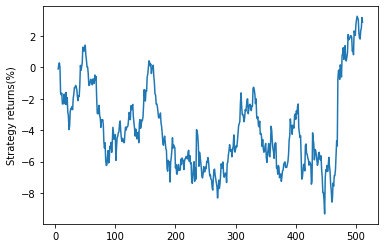

In [35]:
y = df1['Prec_OC'].cumsum()
x = df1.index

plt.plot(x,y)
plt.ylabel("Strategy returns(%)")